<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/Implicit_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1D Reservoir Simulation - Implicit Method.

Divyanshu Vyas | dvyas13ad@gmail.com

Courtsey :- T. Ertekin, Abou Kassem et al.

##Problem Statement:-

>1D Reservoir, where unsteady state single phase oil flow is taking place. 

>Homogeneous Reservoir : phi = 30% | Kx = 178 mD

>BC : No Flow Boundaries each.

>Well Blocks:- 2 & 6 (Natural order) :- 2000 STB/D (Production).

>Initial P (each GB) :- 4000 psia

>Use delta T = 10 days. 

>Other props: mu = 1 cP | B = 1 RB/STB | c = 5*10^-6 psi-1


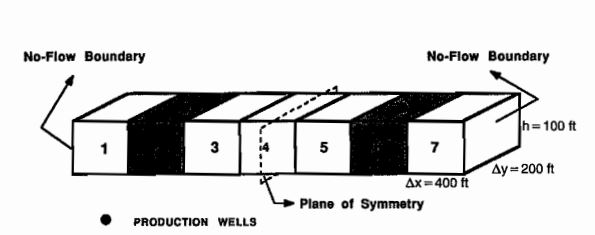

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
qsc = np.array([0,-2000,0,0,0,-2000,0]).reshape(7,1)

phi = 0.30

kx = 178

P_i = np.ones(7)*4000 #psia

dt = 10 #days

mu = 1

B = 1

c = 5E-6


dx = 400
dy = 200
h = 100
# x = np.arange(dx/2,L - dx/2 , dx)

t = np.arange(0,370,dt)

p = np.zeros((len(t),len(P_i)))

P = pd.DataFrame(p)



In [79]:
P.loc[0,:] = P_i
P.head()

,0,1,2,3,4,5,6
0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(7, 1)

In [80]:
#Initial Calculations

#M = mu*B*dx/(beta*kx*Ax)
Ax = dy*h


M = (mu*B*dx)/(0.001127*kx*Ax)

R = (phi*mu*c*dx**2)/(0.001127*5.615*kx*dt)

In [21]:
# M = 0.1
# R = 0.021

0.021306767298291878

In [ ]:
#Matrix looks like this:-

# -3-R    1       0     0     0     0     0
#   1   (-2-R)    1     0     0     0     0
#   0      1   (-2-R)   1     0     0     0
#   0      0      1   (-2-R)  1     0     0
#   0      0      0     1   (-2-R)  1     0
#   0      0      0     0     1   (-2-R)  1
#   0      0      0     0     0     1   (-3-R)

In [22]:
# np.diag?

In [33]:
# T = np.zeros((7,7))


# d_0 = np.array([(-3-R),(-2-R),(-2-R),(-2-R),(-2-R),(-2-R),(-3-R)])

# d_1 = np.array([1,1,1,1,1,1])


# # np.diag(T,k=0) = d_0.values()

# # np.diag(T,k=1) = d_1

# # np.diag(T,k=-1) = d_1

# np.fill_diagonal(T,d_0)

In [38]:
# # print(T)
# tri_dia = np.tri(7,7,k=0,dtype='float') this is for a triangular matrix.

Important Step : Creating the Sparse Matrix

In [81]:
from scipy.sparse import diags
diagonals = [d_0,d_1,d_1]

T = diags(diagonals, [0, 1, -1]).toarray()

In [51]:
#

(7,)

In [82]:
from scipy.linalg import solve

In [92]:
# #Now RHS matrix
# for j in range(1,len(t)):
#   Pi_n = np.array(P.loc[j-1,:]).reshape(7,1)

#   rhs = -M*qsc -R*(np.array(P.loc[j-1,:]).reshape(7,1))

#   rhs = rhs.reshape(7,1)

#   x = solve(T,rhs)

#   P.loc[j,:] = x.reshape(7)

p1 = np.array(P.loc[0,:]).reshape(7)

# rhs = -M*qsc - R*p1

In [98]:
rhs = -M*qsc - R*p1

x = solve(T,rhs)

x

array([ 45.418662  ,  51.99664168, 173.85126313, 214.18302381,
       173.85126313,  51.99664168,  45.418662  ])

In [99]:
p1 = x

rhs = -M*qsc - R*p1

x = solve(T,rhs)

x


array([ -87.88328775, -266.49009686, -252.48699818, -247.56778961,
       -252.48699818, -266.49009686,  -87.88328775])